# Step1:UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE
DATA SOURCE:https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Visulaize and explore dataset

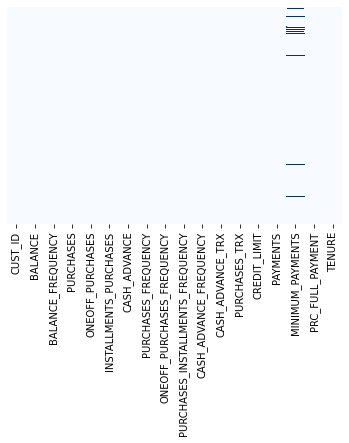

In [ ]:
#through heatmap we are checking nullvalues
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
#from heatmap we knew that minimum payment has nullvalues

In [ ]:
#fill up null/missing values with mean of the 'Minimumpayments'
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [ ]:
df.isnull().sum()#observe there were no nullvalues now

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#lets see if we have duplicate entries in data
df.duplicated().sum()

0

In [ ]:
#customer id makes no difference so lets drop it
#final_df.drop('current_year',axis=1,inplace=True)
df.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
len(df.columns)#no of columns

17

In [ ]:
df.columns#name of columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

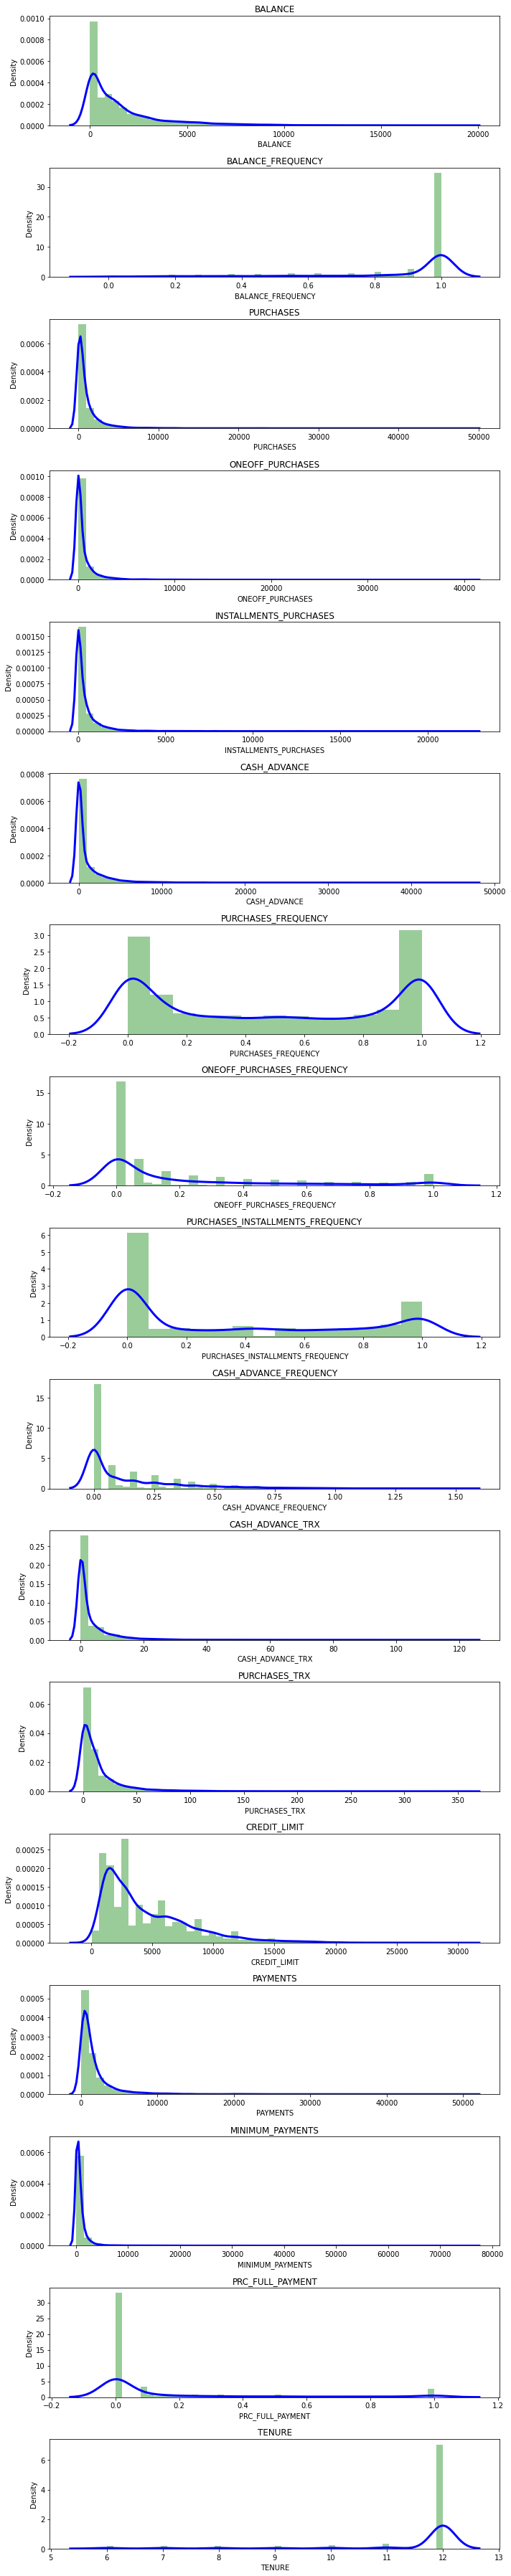

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17,1,i+1)
  #using distplot we are checking how our data is distributed for every column
  sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(df.columns[i])

plt.tight_layout()

# FIND OPTIMAL NO OF CLUSTERS USING ELBOW METHOD and Scaling data

In [ ]:
#the line chart looks like an arm,then the 'elbow on arm is value of k that is best
scaler= StandardScaler()
df_scaled=scaler.fit_transform(df)#it is an array

In [ ]:
df_scaled
#df_scaled.shape

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
wss=[]#empty list
cluster_range=range(1,10)

for k in cluster_range:
  km=KMeans(n_clusters=k)
  km.fit(df)
  inertia=km.inertia_#Sum of squared distances of samples to their closest cluster center.

  wss.append(inertia)


print(wss)

[393060990475.3505, 279296684341.9989, 232802587925.89404, 206555454495.88953, 181564391181.34293, 161534288867.6668, 145206840035.45087, 132875816937.78352, 124180140392.31468]


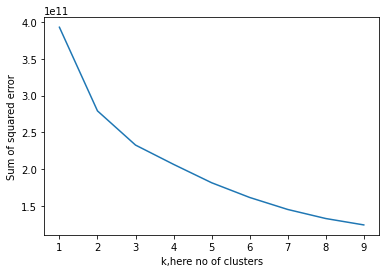

In [ ]:
plt.xlabel('k,here no of clusters')
plt.ylabel('Sum of squared error')
plt.plot(cluster_range,wss)

In [ ]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]
# Heatmap
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


# Apply Kmeans method

In [ ]:
kmeans=KMeans(8)
kmeans.fit(df_scaled)

labels=kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape#8 centers

(8, 17)

In [ ]:
_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.764592,0.473435,2.064996,1.731724,1.701219,-0.213786,1.155626,1.737259,1.075623,-0.310885,-0.228169,2.439357,1.161928,1.138071,0.330830,0.216590,0.316805
1,-0.332825,-0.344129,-0.287118,-0.205018,-0.301852,0.072498,-0.196537,-0.269970,-0.234654,0.313908,0.002881,-0.385982,-0.563404,-0.392199,-0.205867,-0.035486,-3.194122
2,-0.157269,0.399312,0.041255,-0.049497,0.188400,-0.324336,0.934004,0.249967,0.842853,-0.392173,-0.314657,0.250184,-0.177626,-0.160237,0.011260,-0.335804,0.287921
3,1.669858,0.393034,-0.212594,-0.145883,-0.234721,2.026867,-0.461306,-0.171898,-0.422325,1.930557,1.945834,-0.260515,1.023866,0.830288,0.533861,-0.390869,0.068168
4,-0.699897,-2.195305,-0.322394,-0.242895,-0.315917,-0.315261,-0.576584,-0.456836,-0.449926,-0.512890,-0.369854,-0.426822,-0.196259,-0.209210,-0.253908,0.118581,0.196326
5,0.019980,0.402108,-0.360843,-0.240333,-0.411548,-0.083554,-0.887149,-0.398224,-0.790447,0.124598,-0.015654,-0.491331,-0.296503,-0.246901,-0.006111,-0.452676,0.271369
6,-0.689670,0.142586,0.147249,0.014586,0.320900,-0.448876,0.917917,0.373624,0.737651,-0.642943,-0.458384,0.241270,0.146420,-0.104680,-0.292173,2.168028,0.190779
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [ ]:
#in order to understand what these numbers mean,lets perform inverse transformation
#dont run it many times this cell it will re inverse and values raise exponentially
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3155.908240,0.989423,5415.101670,3466.743927,1949.458661,530.551739,0.954159,0.720716,0.791917,0.072933,1.691743,75.343119,8722.018349,5027.747460,1635.192092,0.217064,11.941284
1,871.727207,0.795750,389.773601,252.149727,138.106190,1130.903517,0.411471,0.121920,0.271180,0.197960,3.268489,5.115756,2444.556993,597.766825,384.441450,0.143336,7.242765
2,1237.133322,0.971864,1091.347130,510.282617,581.435671,298.724145,0.865212,0.277028,0.699409,0.056666,1.101523,20.928473,3848.173941,1269.272432,890.446663,0.055498,11.902630
3,5040.142347,0.970377,548.995531,350.300681,198.812252,5229.306496,0.305206,0.151177,0.196594,0.521468,16.527714,8.234411,8219.693471,4136.745743,2108.347299,0.039392,11.608545
4,107.698377,0.357223,314.404292,189.280775,125.387809,317.753603,0.258940,0.066175,0.185625,0.032510,0.724844,4.100623,3780.377956,1127.500953,272.484104,0.188398,11.780053
5,1606.060776,0.972526,232.258543,193.533870,38.910090,803.654367,0.134295,0.083660,0.050293,0.160078,3.142001,2.497190,3415.648807,1018.389592,849.965432,0.021315,11.880480
6,128.985408,0.911048,1317.805054,616.647198,701.253739,37.557095,0.858755,0.313917,0.657599,0.006485,0.120690,20.706897,5027.187010,1430.104634,183.308654,0.787826,11.772629
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [ ]:
labels.shape#labels associated to each datapoint(each row is a data point )these datapoints will come under any label in between 0-7

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans=kmeans.fit_predict(df_scaled)
y_kmeans#we are predicting the cluster labels

array([7, 5, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
#lets assign these cluster labels to the dataset
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)

In [ ]:
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


<function matplotlib.pyplot.show>

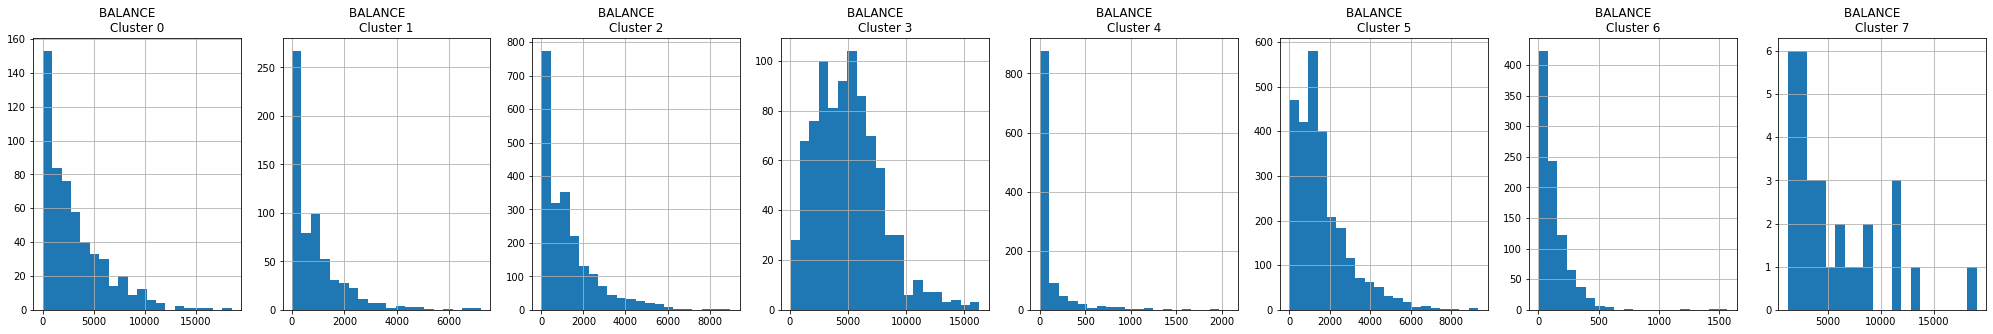

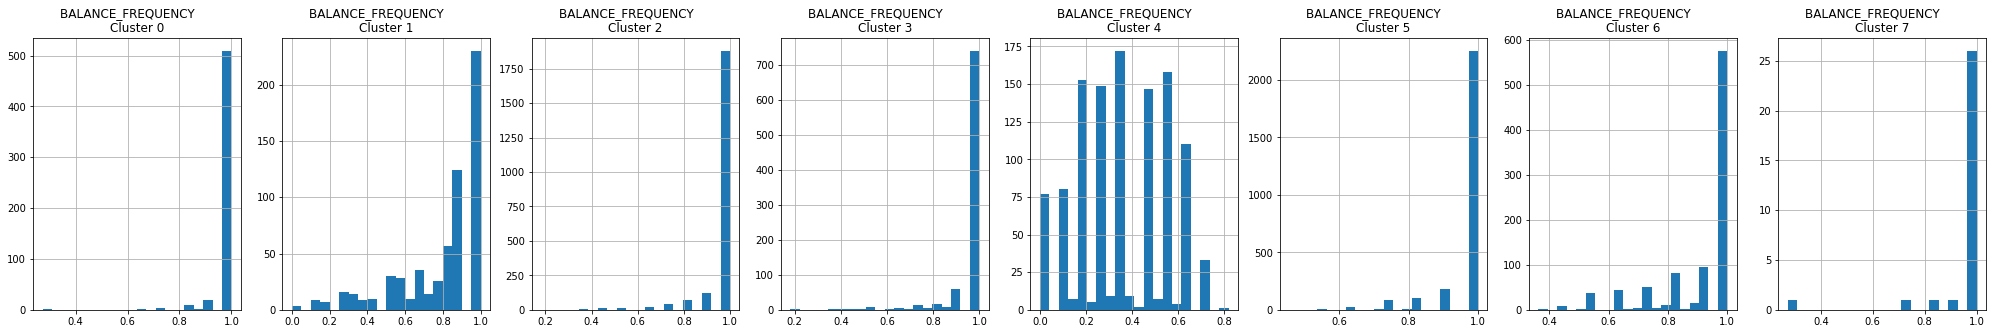

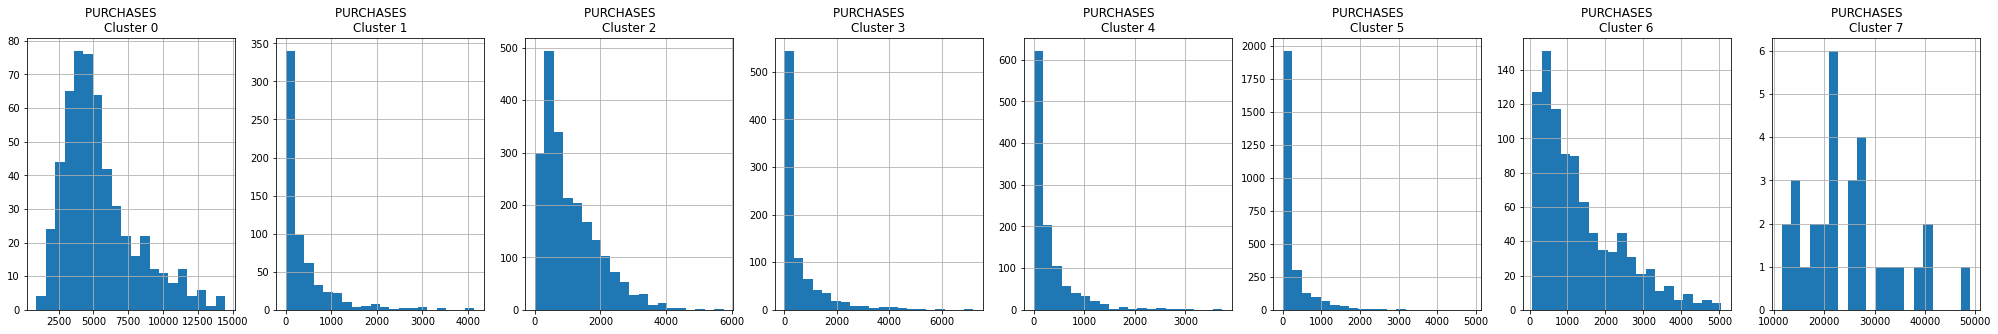

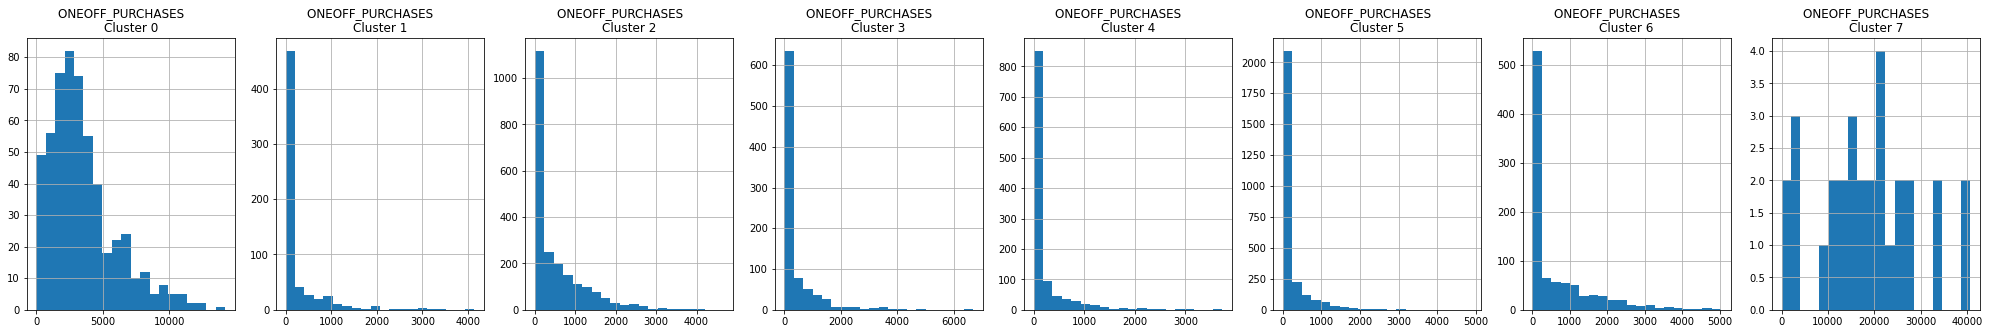

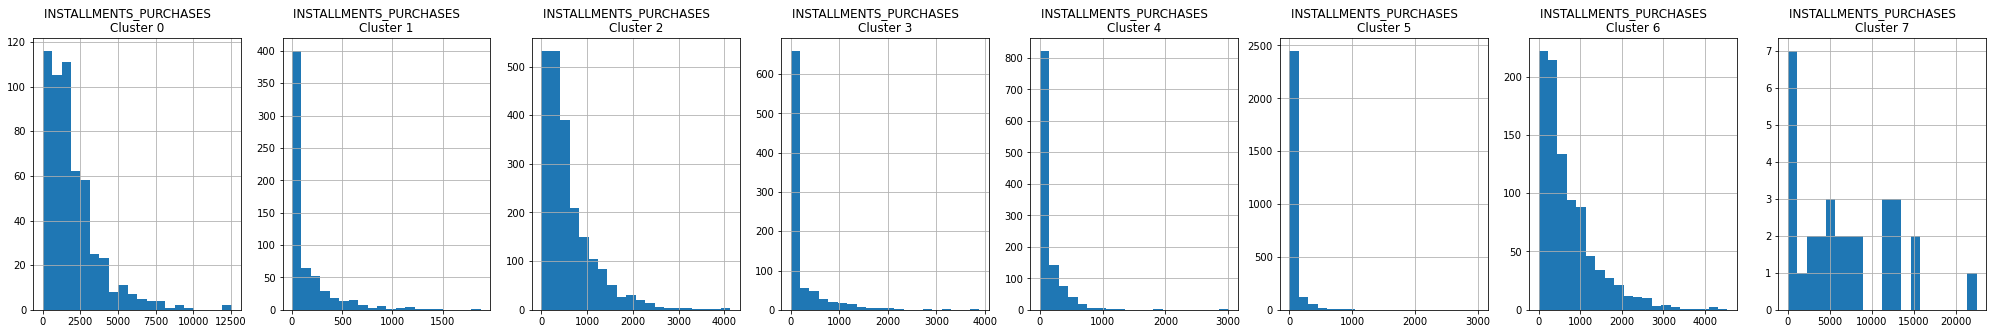

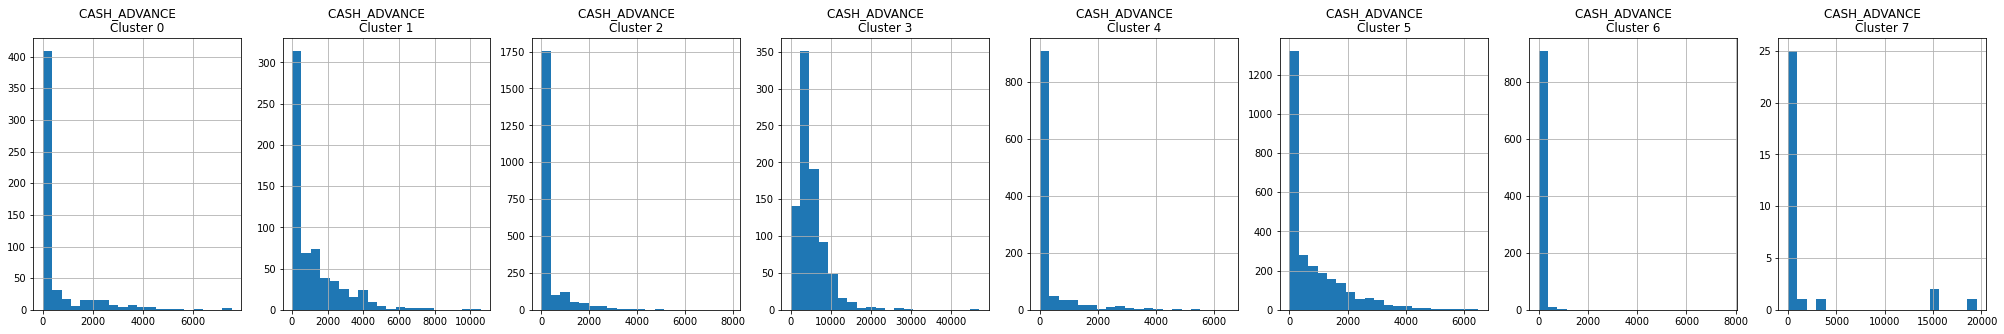

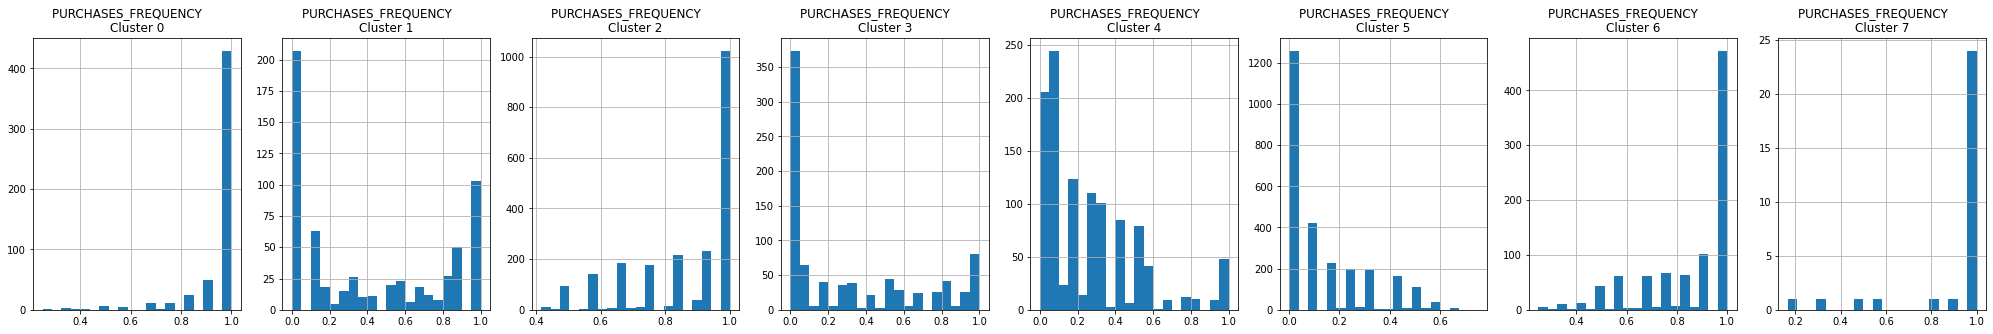

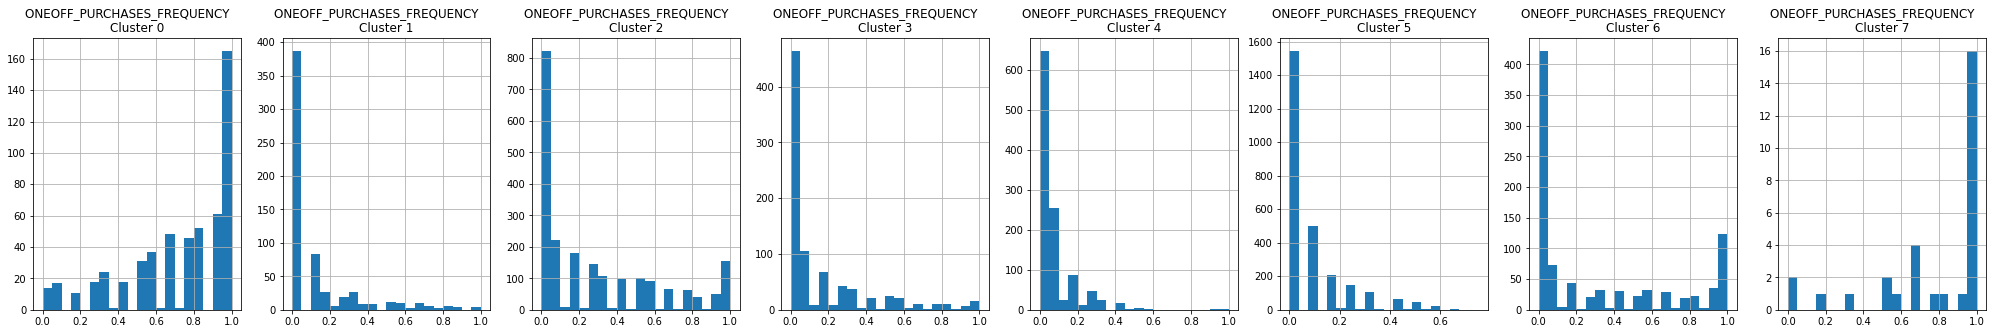

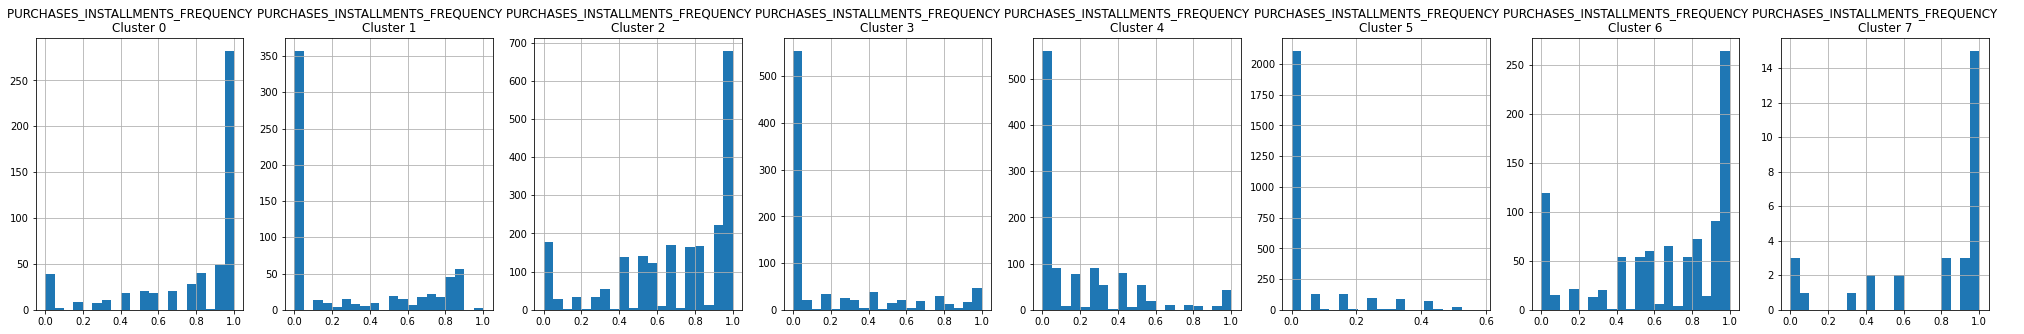

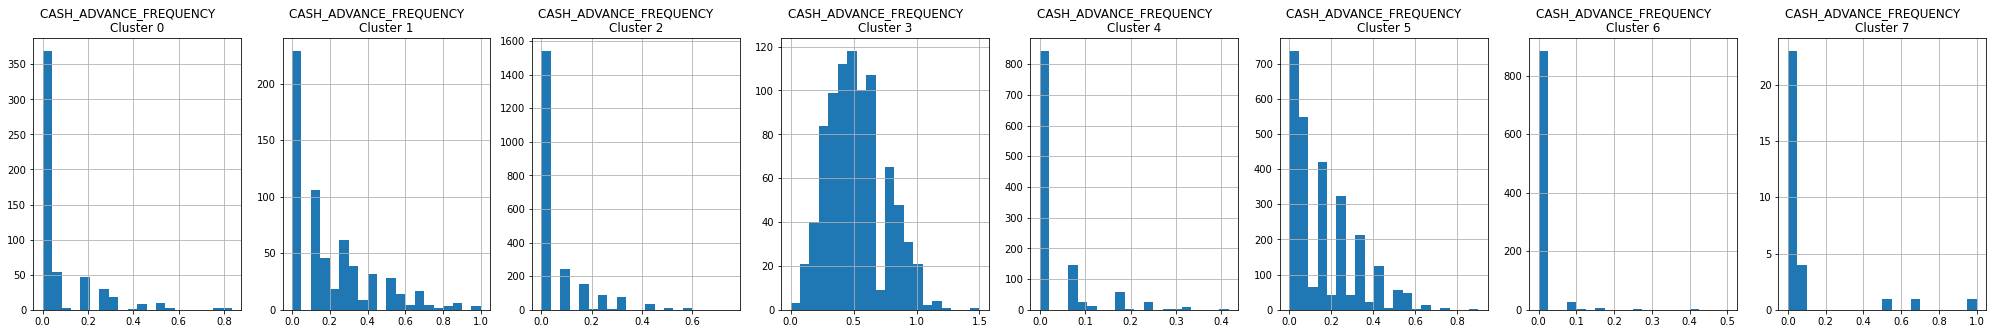

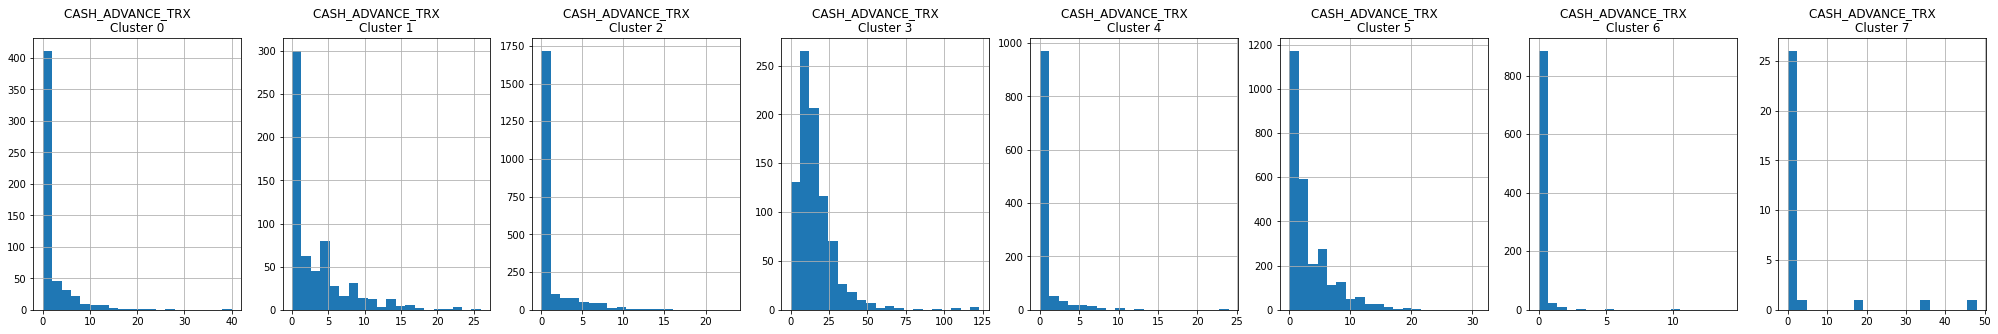

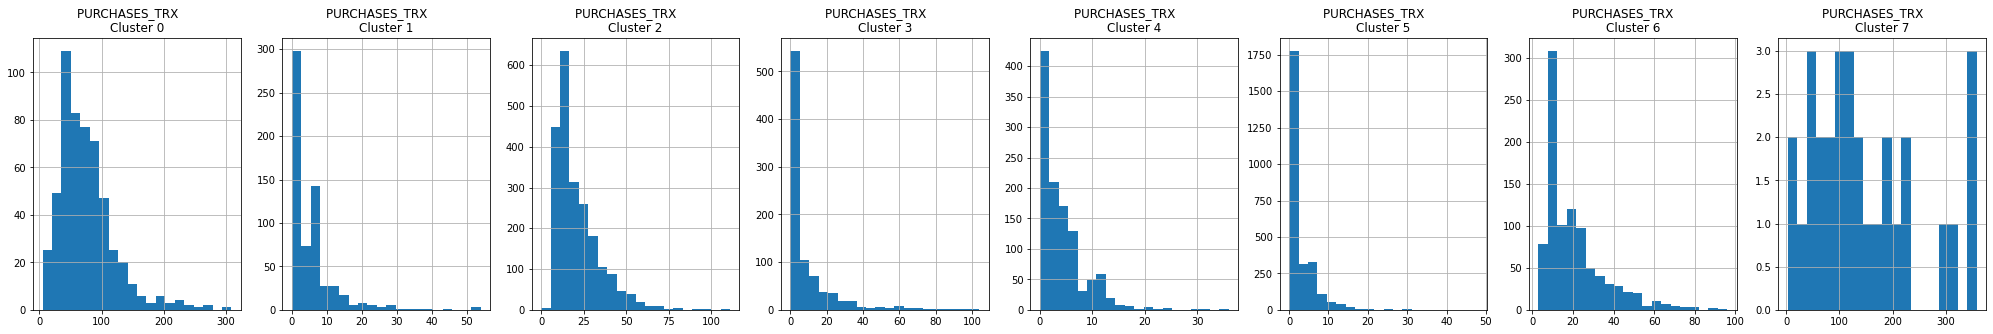

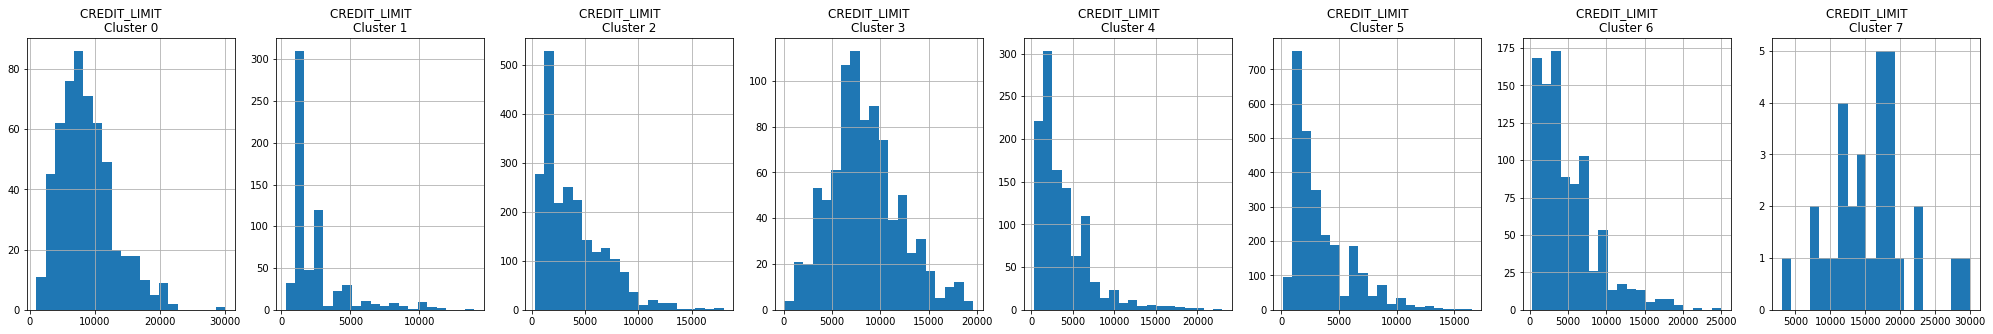

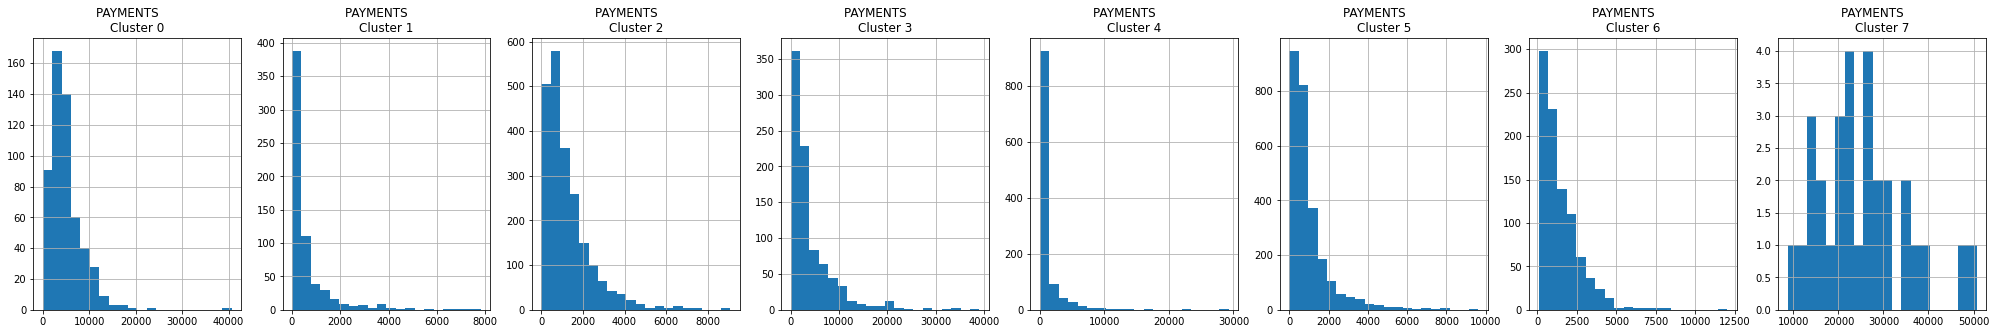

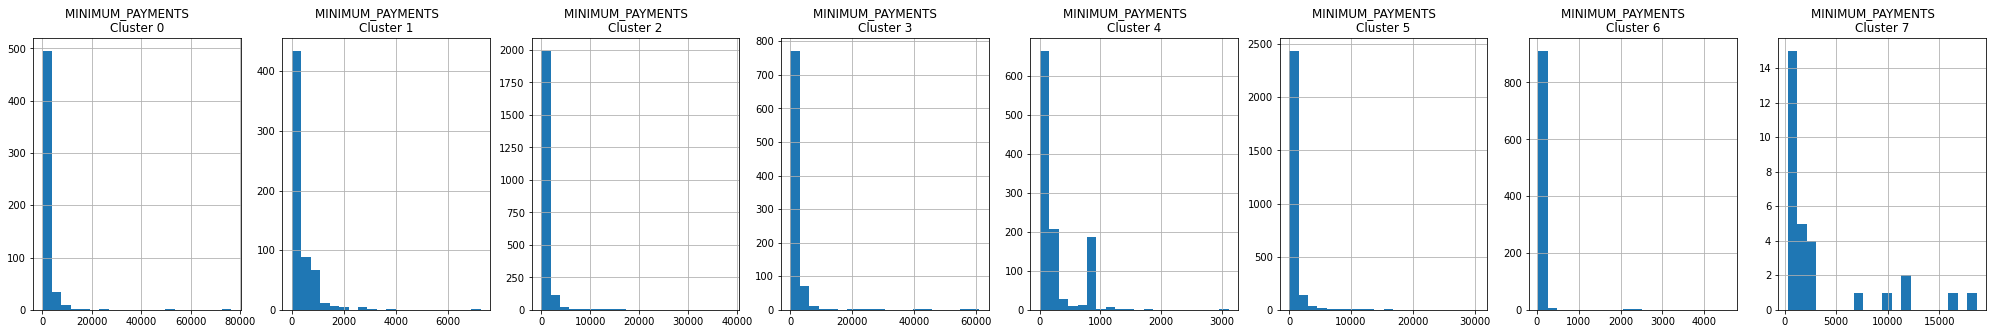

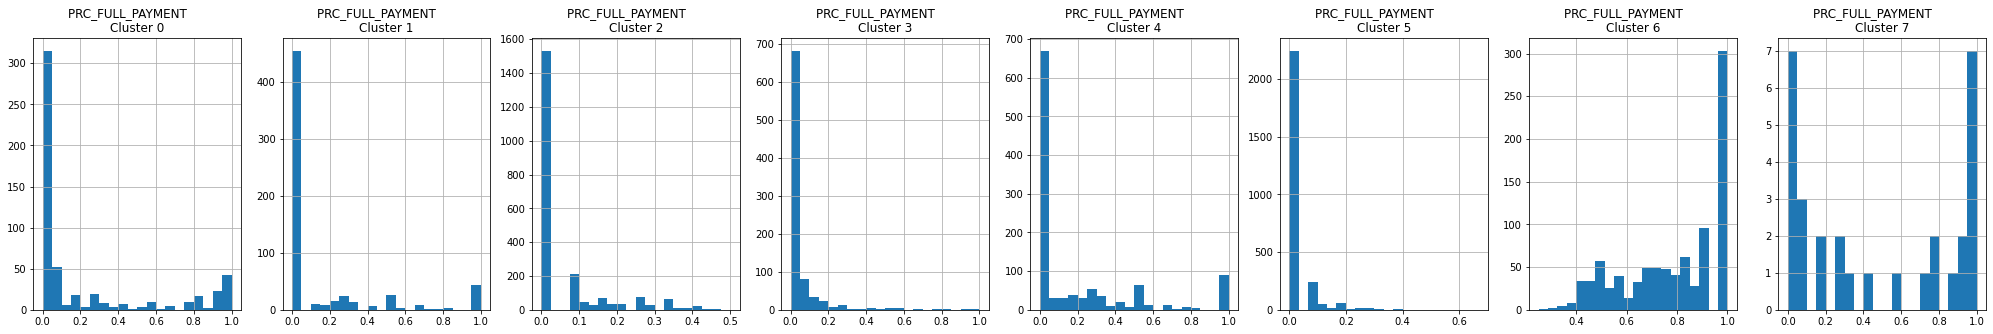

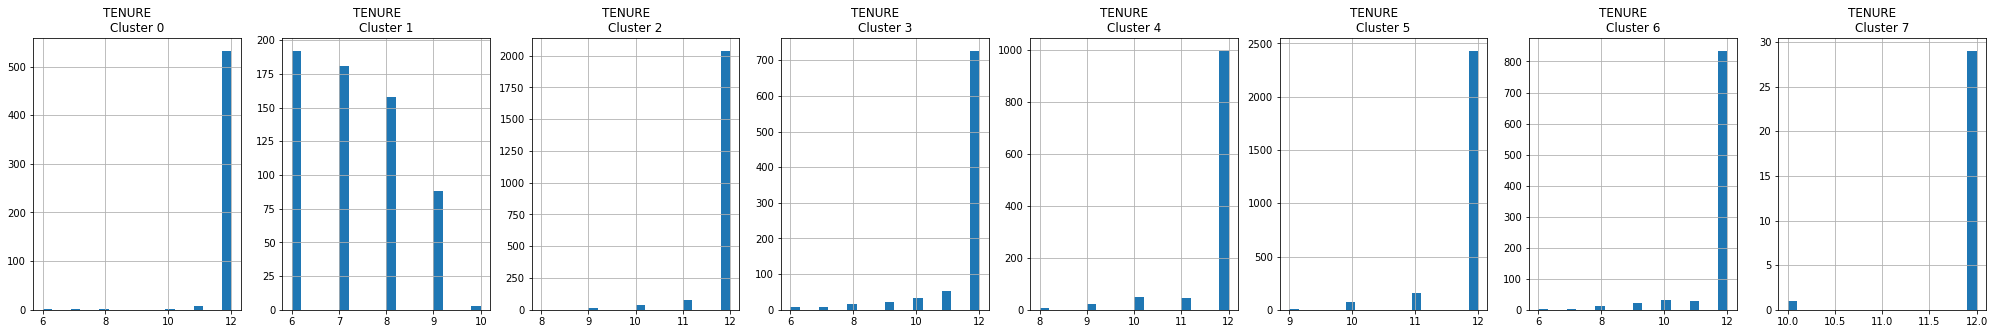

In [ ]:
#plot the histohram of various clusters
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster=df_cluster[df_cluster['cluster']==j]
    cluster[i].hist(bins=20)
    plt.title('{}     \nCluster {}'.format(i,j))


plt.show

# APPLY PCA(PRINCIPAL COMPONENT ANALYSIS) AND VISUALIZE THE RESULTS

In [ ]:
#we dont need all 17 columns we pick only important columns/features
#PCA will do that and do reduce dimensionality
pca=PCA(n_components=2)#pricipal components can be less than or equal to no of features
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221928, -1.07645138],
       [-1.13829737,  2.5064531 ],
       [ 0.96968423, -0.38351797],
       ...,
       [-0.92620106, -1.81077441],
       [-2.33654941, -0.65795442],
       [-0.55642348, -0.40046358]])

In [ ]:
#create a data frame with 2 components for visualization
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076451
1,-1.138297,2.506453
2,0.969684,-0.383518
3,-0.873627,0.043157
4,-1.599433,-0.688577


In [ ]:
#concatenate the clusters labels to the dataframe
#pca_df=pd.DataFrame([pca_df,pd.DataFrame({'cluster':labels})] , axis=1)
pca=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca.head()

,pca1,pca2,cluster
0,-1.682219,-1.076451,5
1,-1.138297,2.506453,3
2,0.969684,-0.383518,2
3,-0.873627,0.043157,5
4,-1.599433,-0.688577,5


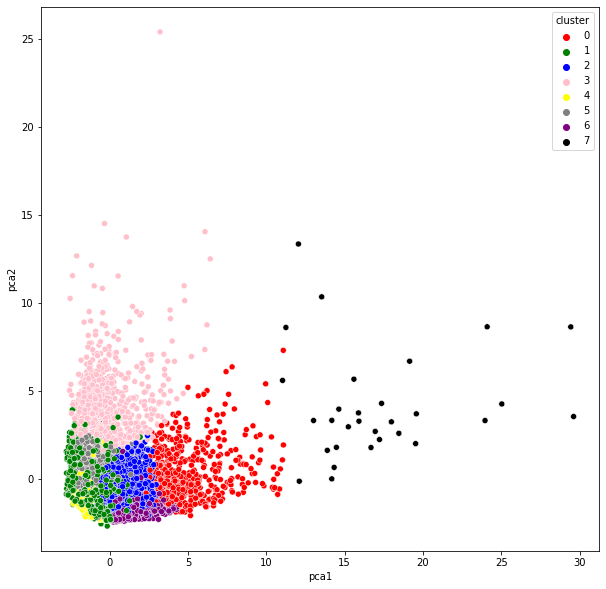

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2', hue='cluster',data=pca,palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.show( )